In [12]:
import pandas as pd;

In [13]:
pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install numpy


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
# Creating a random number generator with a fixed seed (42) for reproducibility
rng = np.random.default_rng(42)

# Defining the number of data points (samples) we are generating
n = 200

# Generating 200 random values of x uniformly in the range [0, 5]
x = rng.uniform(0, 5, size=n)

# Generating 200 random noise values from a normal (Gaussian) distribution with mean=0 and std=1
noise = rng.normal(0, 1.0, size=n)

# Computing y by applying the linear relationship y = 3 + 4x + noise
# (intercept = 3, slope = 4, and adding noise to simulate real-world randomness)
y = 3 + 4 * x + noise


First 5 data points (x, y):
  (3.870, 19.122)
  (2.194, 11.383)
  (4.293, 20.167)
  (3.487, 16.784)
  (0.471, 5.221)


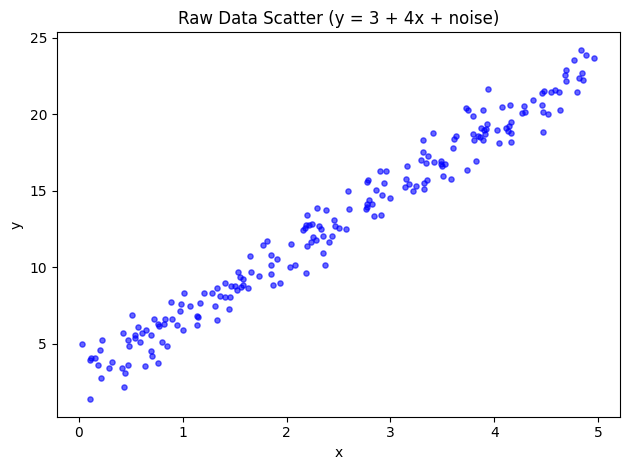

In [18]:
# Printing the first 5 data points (x, y) to check the dataset
print("First 5 data points (x, y):")
for i in range(5):
    print(f"  ({x[i]:.3f}, {y[i]:.3f})")

# Creating a scatter plot for the raw data
plt.figure()
plt.scatter(x, y, s=14, alpha=0.6, color="blue")

# Adding axis labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Raw Data Scatter (y = 3 + 4x + noise)")

# Adjusting layout and saving the figure as an image file
plt.tight_layout()
plt.savefig("q7_scatter.png", dpi=160)

# Showing the plot
plt.show()


### The points are forming a clear positive linear trend with small Gaussian noise.

### This is consistent with the data-generating process; most variation is explained by 𝑥 plus random noise.

In [19]:
# Creating the design matrix X by stacking a column of 1s (for intercept) with x values
X = np.column_stack([np.ones_like(x), x])

# Computing the closed-form solution θ = (X^T X)^(-1) X^T y
theta_closed = np.linalg.inv(X.T @ X) @ X.T @ y

# Unpacking θ into intercept and slope
intercept_closed, slope_closed = theta_closed


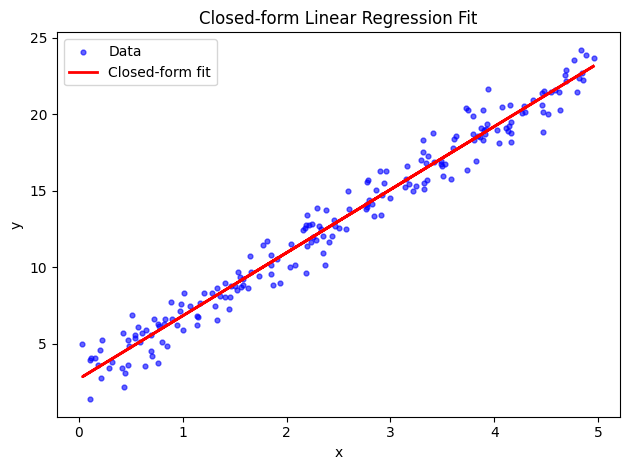

In [20]:
# Using the already computed values:
# intercept_closed, slope_closed, x, y, xx

# Predicting y values using closed-form solution
y_closed = intercept_closed + slope_closed * x

# Creating the closed-form plot
plt.figure()
plt.scatter(x, y, s=12, alpha=0.6, color="blue", label="Data")
plt.plot(x, y_closed, color="red", linestyle="-", linewidth=2, label="Closed-form fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Closed-form Linear Regression Fit")
plt.legend()
plt.tight_layout()
plt.show()

### Estimated parameters:

#### Intercept ≈ 2.6908

#### Slope ≈ 4.1318

### The red line shows a strong alignment with the data trend, confirming that the closed-form solution fits the data well.

In [21]:
# Defining a function for computing the loss (1/2 * MSE)
def mse(theta, X, y):
    # Computing residuals (difference between predictions and actual values)
    r = X @ theta - y
    # Returning half of the mean squared error (common for gradient descent math)
    return np.mean(r ** 2) / 2

# Defining a function for computing the gradient of the loss with respect to θ
def grad(theta, X, y):
    # Computing residuals
    r = X @ theta - y
    # Returning the gradient vector (partial derivatives for intercept and slope)
    return (X.T @ r) / len(y)


In [22]:
# Initializing θ for gradient descent as [intercept=0, slope=0]
theta_gd = np.array([0.0, 0.0])

# Setting the learning rate (step size) for updates
eta = 0.05

# Setting the total number of iterations to run gradient descent
iters = 1000

# Creating an empty list for storing the loss values at each iteration
losses = []


In [23]:
# Running gradient descent for the chosen number of iterations
for _ in range(iters):
    # Computing the gradient of the loss function at the current θ
    g = grad(theta_gd, X, y)
    # Updating θ by stepping in the opposite direction of the gradient
    theta_gd = theta_gd - eta * g
    # Storing the current loss value for plotting later
    losses.append(mse(theta_gd, X, y))

# Extracting the final learned parameters (intercept and slope) from θ
intercept_gd, slope_gd = theta_gd

# Creating evenly spaced x values for plotting fitted lines smoothly
xx = np.linspace(0, 5, 200)

# Computing predicted y values for closed-form line
y_closed = intercept_closed + slope_closed * xx

# Computing predicted y values for gradient descent line
y_gd = intercept_gd + slope_gd * xx


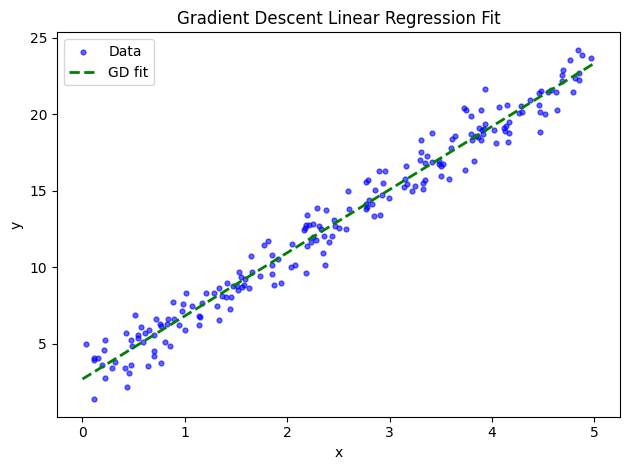

In [24]:
# Using the already computed values:
# intercept_gd, slope_gd, x, y, xx

# Predicting y values using gradient descent solution
y_gd = intercept_gd + slope_gd * xx

# Creating the GD plot
plt.figure()
plt.scatter(x, y, s=12, alpha=0.6, color="blue", label="Data")
plt.plot(xx, y_gd, color="green", linestyle="--", linewidth=2, label="GD fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gradient Descent Linear Regression Fit")
plt.legend()
plt.tight_layout()
plt.savefig("q7_gd_fit.png", dpi=160)
plt.show()

### Final parameters:

#### Intercept ≈ 2.6908

#### Slope ≈ 4.1318

### The green dashed line overlaps closely with the closed-form fit, showing that Gradient Descent converges to the same solution.

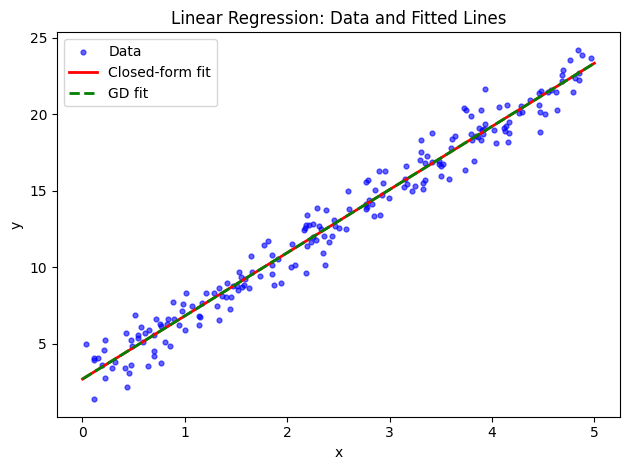

In [25]:
# Creating a new figure for plotting data and fitted lines
plt.figure()

# Plotting the raw data points as a scatter plot
plt.scatter(x, y, s=12, alpha=0.6, color="blue", label="Data")

# Plotting the line from the closed-form solution (solid red line)
plt.plot(xx, y_closed, color="red", linestyle="-", linewidth=2, label="Closed-form fit")

# Plotting the line from gradient descent (dashed green line)
plt.plot(xx, y_gd, color="green", linestyle="--", linewidth=2, label="GD fit")

# Adding axis labels and a title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression: Data and Fitted Lines")

# Adding a legend to distinguish data, closed-form line, and GD line
plt.legend()

# Adjusting layout to prevent label/title overlap
plt.tight_layout()

# Saving the figure as a PNG file
plt.savefig("q7_fits_distinguishable.png", dpi=160)

# Showing the plot
plt.show()


### The red solid (closed-form) and green dashed (GD) lines are overlapping across the range of x.

### This overlap is expected because linear regression with MSE is a convex problem; both methods are minimizing the same objective and are reaching the unique global minimum.

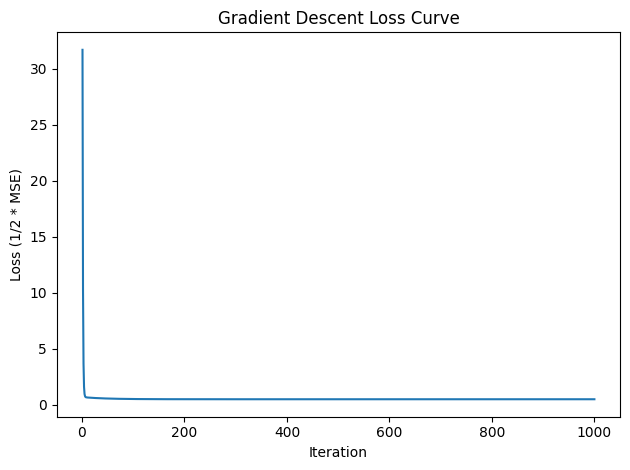

In [26]:
# Creating a new figure for plotting the loss curve
plt.figure()

# Plotting the loss values against iteration number
plt.plot(np.arange(1, iters + 1), losses)

# Adding axis labels and a title
plt.xlabel("Iteration")
plt.ylabel("Loss (1/2 * MSE)")
plt.title("Gradient Descent Loss Curve")

# Adjusting layout so labels and title are fitting nicely
plt.tight_layout()

# Saving the loss curve as a PNG file
plt.savefig("q7_loss.png", dpi=160)



### The loss is starting high (poor initial fit at 𝜃=[0,0]) and is rapidly decreasing in the first few iterations.

### It is flattening as iterations proceed, showing the model is converging and further updates bring minimal gain.

### This shape (sharp drop → plateau) is typical for well-tuned gradient descent on a convex objective.

In [27]:
print("Closed-form solution (Normal Equation):")
print(f"  Intercept: {intercept_closed:.4f}, Slope: {slope_closed:.4f}")
print("\nGradient Descent solution:")
print(f"  Intercept: {intercept_gd:.4f}, Slope: {slope_gd:.4f}")

Closed-form solution (Normal Equation):
  Intercept: 2.6908, Slope: 4.1318

Gradient Descent solution:
  Intercept: 2.6908, Slope: 4.1318
